In [42]:
import joblib
from lightgbm import plot_importance
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
address = "dataset/processed/presentation.csv"
TARGET = "churn"
presentation_df = pd.read_csv(address)

best_features = [
    "age",
    "service_type",
    "overdue_payments",
    "auto_payment",
    "avg_top_up_count",
]

complete_columns = best_features.copy()
complete_columns.append(TARGET)

presentation_df = presentation_df.loc[:, complete_columns]
X = presentation_df.loc[:, presentation_df.columns != TARGET]
y = presentation_df.loc[:, presentation_df.columns == TARGET]

In [12]:
model_address = "models/v1/lightgbm_model_final.pkl"

In [13]:
model = joblib.load(model_address)

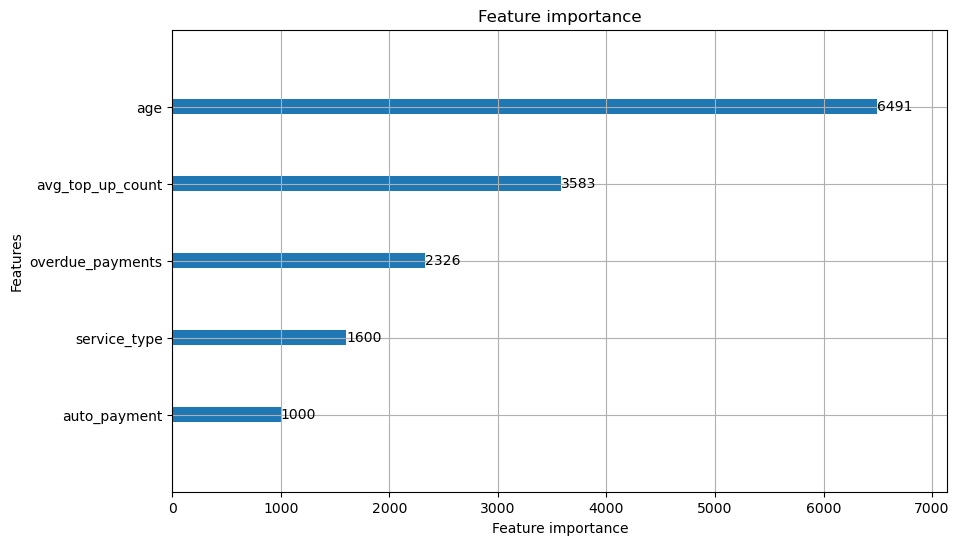

In [14]:
ax = plot_importance(model, max_num_features=40, figsize=(10, 6), importance_type="split")

In [36]:
predicted_prob = model.predict_proba(X)[:,1]

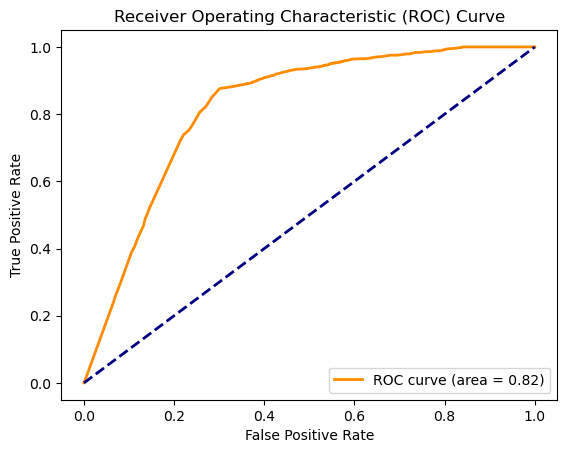

In [48]:
y_pred = model.predict_proba(X)[:, -1]
y_true = y

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the AUC score
auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()